In [1]:
######### Package Import ######################
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from PIL import Image
import random

In [5]:
############## File Loading ##################
file_paths = ["Reddit2015andBefore.csv", "Reddit2018to2015.csv", "Reddit2019.csv", "RedditJan2020_July2020.csv"]

data_list = []

for path in file_paths:
    dataframe = pd.read_csv(path, index_col = False)

    data_list += dataframe["title"].tolist()

    for comment in dataframe["comments"].tolist():
        if type(comment) != float :
            comment_list = comment.split("\n\n")[:-1]
            data_list += comment_list[:-1]


print("Posts and Comments Read:",len(data_list))
news_content = " ".join(data_list).lower()

Posts and Comments Read: 331816


In [6]:
############### Tokenize Words ###################
# word_tokenize() function takes a text blob and breaks it into 'words'.
tokenizer = RegexpTokenizer(r'\w+')
#news_words = word_tokenize(news_content)
news_words = tokenizer.tokenize(news_content)
# print (news_words)
# How many words are in this news article?
print ("Total Number of Words",len(news_words))

Total Number of Words 9029503


In [13]:
################# Load Stopwords #################
# Let's load up English corpus from NLTK package.
stop_words = stopwords.words('english')
# See what words are inside.
stop_words = stop_words + ["black", "https", "matter", "reddit", "blacklivesmatter", "blm", "removed", "comment", "see", "comments", "video", "want", "think", "one", "even", "say", "mean", "know","people"]
# print (stop_words)

In [14]:
########### Filter out Stopwords ############
news_words_filtered = []

for w in news_words:
    if w not in stop_words:
        news_words_filtered.append(w)

# After removing stop words, how many words remain?
print ("Total Number of Words after Filter:",len(news_words_filtered))
# print(news_words_filtered)

Total Number of Words after Filter: 4225597


In [15]:
############# Word Stemming ############3#
porter_stemmer = PorterStemmer()

# Let's stem all the words in our news article.
news_words_filtered_stemmed = []
for w in news_words_filtered:
    news_words_filtered_stemmed.append(porter_stemmer.stem(w))

print("Words Stemmed")
# print (news_words_filtered_stemmed[:500])

Words Stemmed


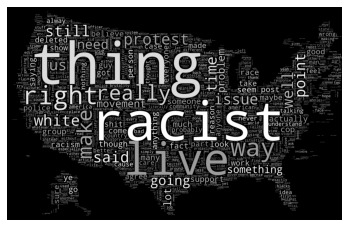

WordCloud Original


In [16]:
############# Form Word Cloud ###############
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
# Word Cloud takes a string. Convert our list of words into a string.
words_joined_stemmed = " ".join([w for w in news_words_filtered_stemmed])
words_joined = " ".join([w for w in news_words_filtered])
# print(words_joined[:1000])
mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
my_wordcloud = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

# worldcloud2 = WordCloud(background_color='white',
#                          width=3000,
#                          height=2000).generate(words_joined_stemmed)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.savefig('RedditWFCloud.png', dpi=300)
plt.show()
print("WordCloud Original")

# plt.imshow(worldcloud2)
# plt.axis('off')
# plt.show()
# print("WorldCloud Stemmed")



In [11]:
Vector_stop_words = stopwords.words('english')
Vector_stop_words = Vector_stop_words + ['blacklivesmatter', 'blacklivesmatters', 'https', 'http', "blm", "co", "amp","followme","24","apples"]
cv=CountVectorizer(max_df = 0.85, stop_words =Vector_stop_words, min_df = 0.001, ngram_range= (1,3))

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(data_list)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print(word_count_vector)
#(294165 , 149940) refers to 294165 documents, 149940 refers to vocabulary size
# print idf values

df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])

# sort ascending
df_sorted = df_idf.sort_values(by=['idf_weights'], ascending = False)

# print(word_count_vector.stop_words_)
print("Printing top 20 words out of", len(df_sorted))
print(df_sorted[:20])

Printing top 20 words out of 2246
                  idf_weights
reminder             7.904196
label                7.904196
unarmed black        7.904196
regards              7.904196
libertarian          7.904196
medical              7.904196
outright             7.904196
deserved             7.901198
surely               7.901198
kia                  7.901198
alternative          7.901198
age years months     7.901198
trial                7.901198
star                 7.901198
suggesting           7.898208
sell                 7.898208
services             7.898208
understood           7.898208
delete               7.898208
analysis             7.898208


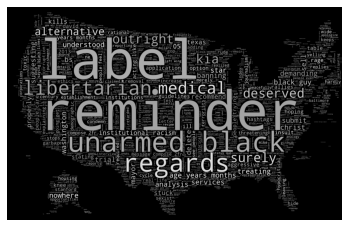

In [12]:
########## Generate IDF word cloud ################333

mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
wc = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

weights = df_sorted.to_dict()

wc.generate_from_frequencies(weights['idf_weights'])

plt.imshow(wc)
plt.axis('off')
plt.savefig('RedditIDFCloud.png', dpi=300)
plt.show()